**Title:** What the Shell?!

**Team member:** Laurelyne Barbier, Carter Gunning, Sebastian Martinez Sotomayor and Tayte Stefaniuk

**Introduction**

Abalones are a type of mollusk that are found in marine environments and commonly considered a delicacy in a plethora of cuisines. Their popularity is reflected by their price, costing up to 100$ per shell, (The Pricer, 2021). Consequently, many species of this marine mollusk have been classified as endangered. This prompted scientific research into their populations (Kerlin, 2022) which requires knowing the age stratification. Determining the age of an abalone involves cutting the shell, staining it, and counting the rings that are formed perennially using a microscope. 
The tediousness of this procedure inspired our group to explore the following question: Can the age of an abalone can be predicted based on several measurements describing its dimensions and weight using a regression model in R?

The dataset we will be using to answer this question give various statistics on the physical characteristics of 4178 different mollusks.  These statistics include the length, diameter, height, weight, shucked weight, viscera weight (this is the gut weight after bleeding), shell weight (after being dried) and number of rings of these mollusks..  One categorical variable they use is sex of the mollusk which can be male, female, or infant (infant is a category because mollusks can switch sexes) (Kaggle, n.d.).   We also added the variable age, which is the number of rings plus 1.5 (Nash & Sellers, 1994).


**Preliminary exploratory data analysis**

In [2]:
###
### Tidy Package
###

library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source("cleanup.R")

# functions needed to work with images
# code below sourced from: https://gist.github.com/daviddalpiaz/ae62ae5ccd0bada4b9acd6dbc9008706
# helper function for visualization
show_digit = function(arr784, col = gray(12:1 / 12), ...) {
  arr784$X <- 0  # avoid dark pixel in top left
  image(matrix(as.matrix(arr784[-785]), nrow = 28)[, 28:1], col = col, ...)
}

#set seed

set.seed(1969)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


**Demonstrate that the dataset can be read from the web into R**


In [3]:
#reading the dataset from our github repository (data originally from Kaggle/UC Davis)
raw_shell <- read_csv("https://raw.githubusercontent.com/laurelyne/group_28_project/main/data/abalone.csv")
raw_shell

Rows: 4177 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Sex
dbl (8): Length, Diameter, Height, Whole weight, Shucked weight, Viscera wei...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.308,9
F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10
M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


**Clean and wrangle your data into a tidy format:**

Data is already tidy.


In [4]:
#lowercase column names & rid of spaces
names(raw_shell) <- tolower(names(raw_shell))
shell <- rename(raw_shell, "whole_weight" = "whole weight","shucked_weight" = "shucked weight", "viscera_weight" =
        "viscera weight", "shell_weight" = "shell weight")

#adding an age column, knowing that age in years = number of rings + 1.5.
shell <- mutate(shell, age = rings + 1.5)
shell


sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,age
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,16.5
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,8.5
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9,10.5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.308,9,10.5
F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10,11.5
M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12,13.5


**Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data.**


In [5]:
#splitting the data into a training and testing set

shell_split <- initial_split(shell, prop = 0.75, strata = age)  
shell_train <- training(shell_split)
shell_test <- testing(shell_split)

shell_train
shell_test


sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,age
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5
I,0.355,0.280,0.085,0.2905,0.0950,0.0395,0.115,7,8.5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
F,0.635,0.500,0.175,1.4770,0.6840,0.3005,0.390,12,13.5
F,0.655,0.500,0.220,1.3590,0.6420,0.3255,0.405,13,14.5
M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12,13.5


sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,age
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,8.5
F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.33,20,21.5
F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.26,16,17.5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
M,0.520,0.385,0.165,0.7910,0.3750,0.1800,0.1815,10,11.5
M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [6]:
# finding the number of observations of each sex
shell_obs <- shell_train|>
    group_by(sex)|>
    summarize(count = n())
shell_obs

# finding the means of numerical predictor variables

shell_means <- shell_train |>
    select(length:shell_weight)|>
    map_df(mean)
shell_means

sex,count
<chr>,<int>
F,978
I,1013
M,1140


length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.5244858,0.4082242,0.1393341,0.8323307,0.3603009,0.1814642,0.2402563


**Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.**


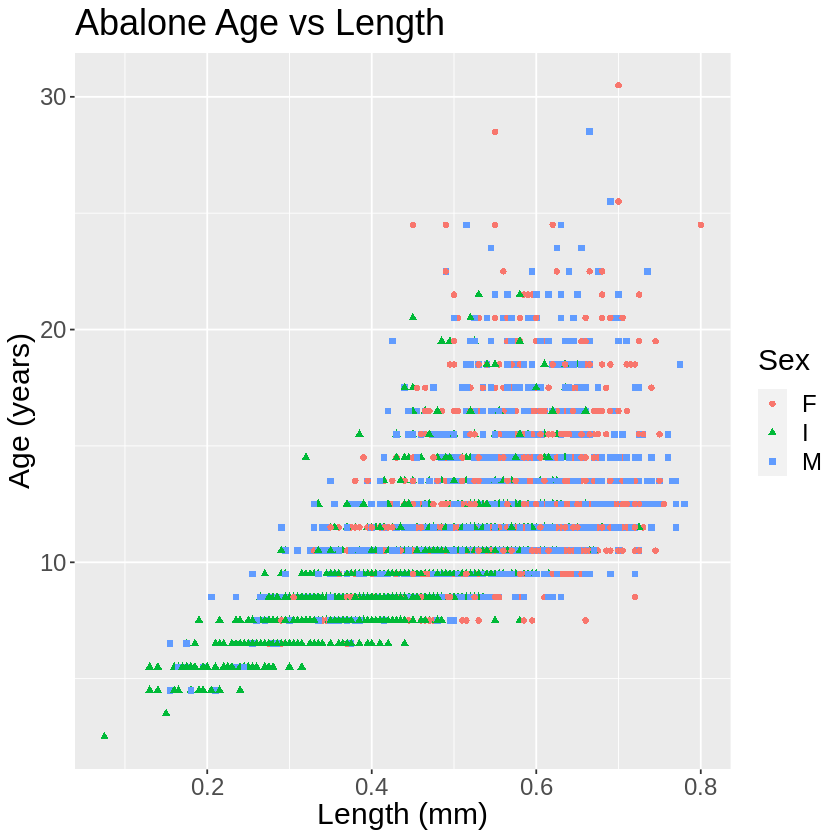

In [7]:
#creating a plot to evaluate length as an age predictor (taking sex into account)

comparative_plot_length <- shell_train|>
    ggplot(aes(x = length, y = age)) +
           geom_point(aes(color = sex, shape = sex)) +
    labs(x = "Length (mm)", y = "Age (years)", color = "Sex", shape = "Sex") +
    ggtitle("Abalone Age vs Length") +
    theme(text = element_text(size = 18))
comparative_plot_length

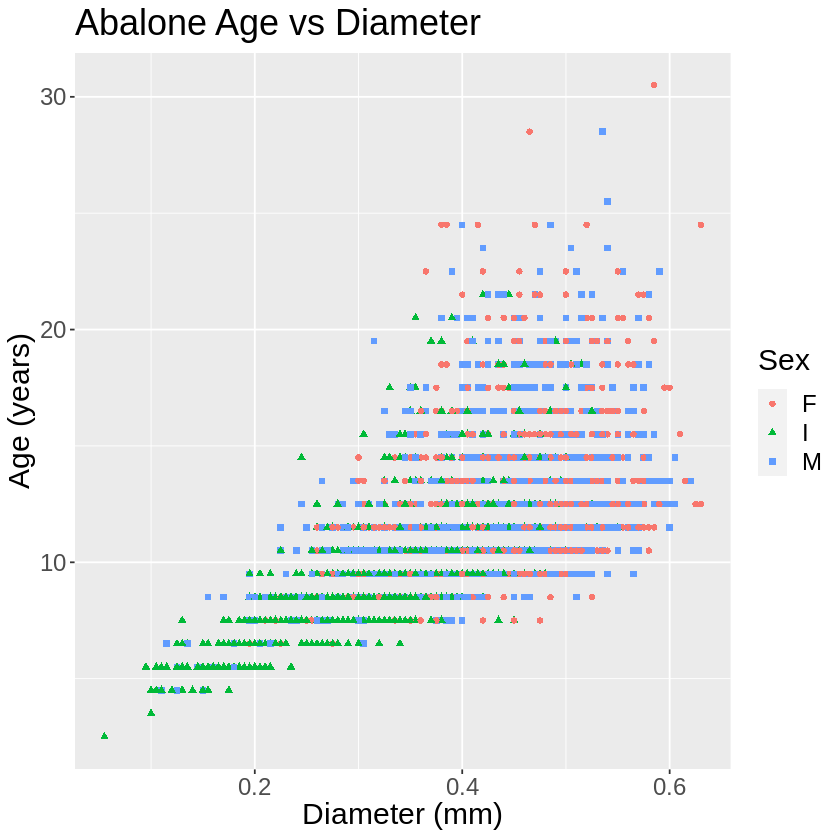

In [8]:
#creating a plot to evaluate diameter as an age predictor (taking sex into account)

comparative_plot_diameter <- shell_train|>
    ggplot(aes(x = diameter, y = age)) +
           geom_point(aes(color = sex, shape = sex)) +
    labs(x = "Diameter (mm)", y = "Age (years)", color = "Sex", shape = "Sex") +
    ggtitle("Abalone Age vs Diameter") +
    theme(text = element_text(size = 18))
comparative_plot_diameter

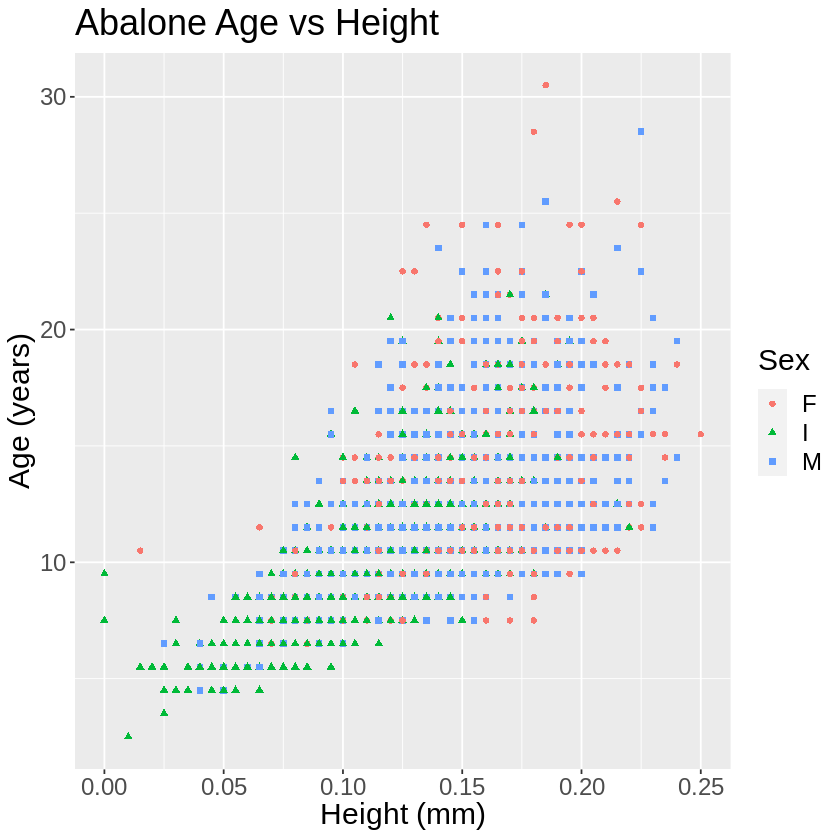

In [14]:
#creating a plot to evaluate height as an age predictor (taking sex into account)
#removed 2 outliers by filtering out  heights greater than 0.4 mm

comparative_plot_height <- shell_train|>
    filter(height < 0.4)|>
    ggplot(aes(x = height, y = age)) +
           geom_point(aes(color = sex, shape = sex)) +
    labs(x = "Height (mm)", y = "Age (years)", color = "Sex", shape = "Sex") +
    ggtitle("Abalone Age vs Height") +
    theme(text = element_text(size = 18))
comparative_plot_height

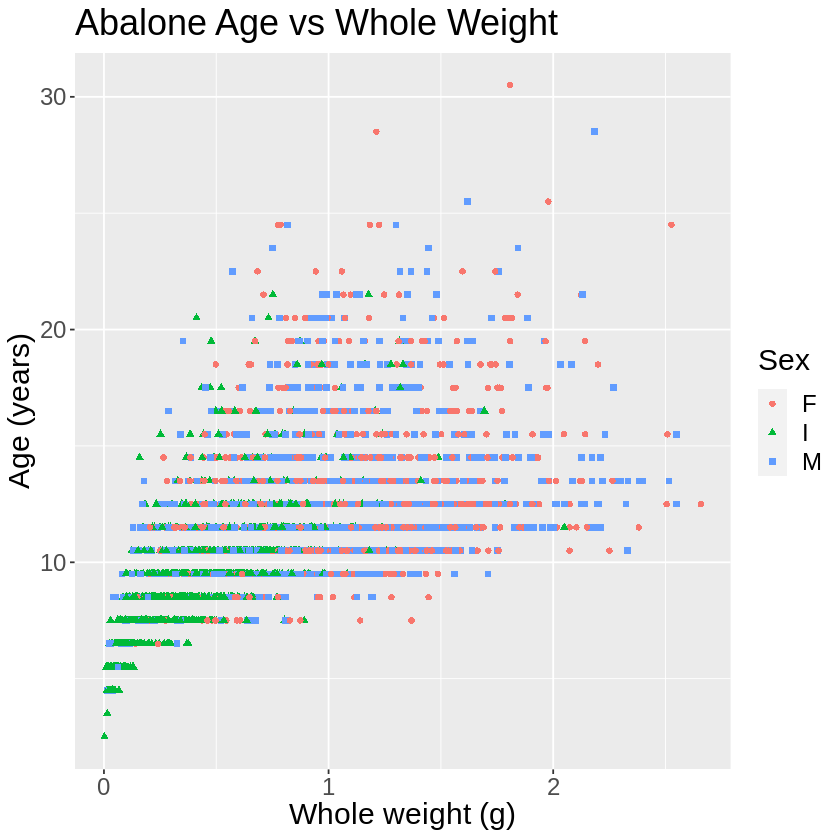

In [10]:
#creating a plot to evaluate whole weight as an age predictor (taking sex into account)
comparative_plot_whole_weight <- shell_train|>
    ggplot(aes(x = whole_weight, y = age)) +
           geom_point(aes(color = sex, shape = sex)) +
    labs(x = "Whole weight (g)", y = "Age (years)", color = "Sex", shape = "Sex") +
    ggtitle("Abalone Age vs Whole Weight") +
    theme(text = element_text(size = 18))
comparative_plot_whole_weight

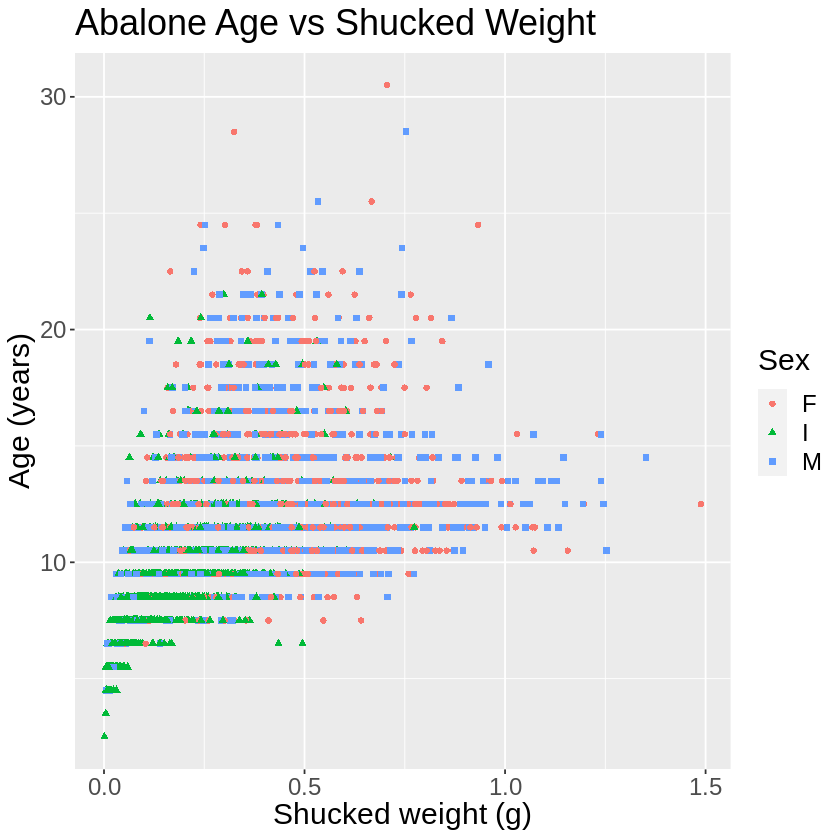

In [11]:
#creating a plot to evaluate shicked weight as an age predictor (taking sex into account)
comparative_plot_shucked_weight <- shell_train|>
    ggplot(aes(x = shucked_weight, y = age)) +
           geom_point(aes(color = sex, shape = sex)) +
    labs(x = "Shucked weight (g)", y = "Age (years)", color = "Sex", shape = "Sex") +
    ggtitle("Abalone Age vs Shucked Weight") +
    theme(text = element_text(size = 18))
comparative_plot_shucked_weight

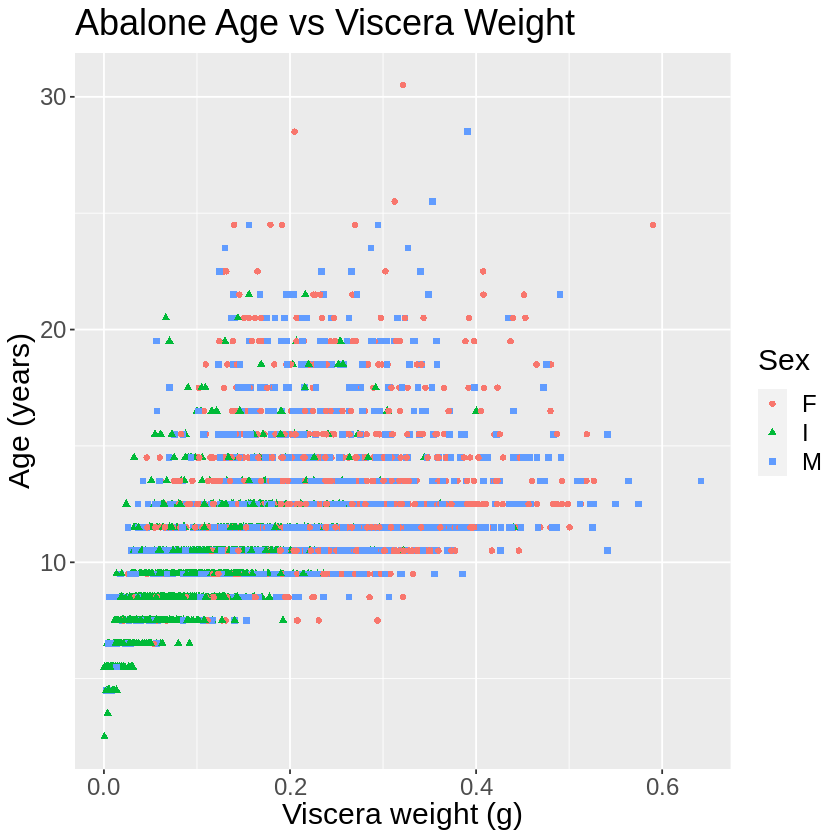

In [12]:
#creating a plot to evaluate viscera weight as an age predictor (taking sex into account)
comparative_plot_viscera_weight <- shell_train|>
    ggplot(aes(x = viscera_weight, y = age)) +
           geom_point(aes(color = sex, shape = sex)) +
    labs(x = "Viscera weight (g)", y = "Age (years)", color = "Sex", shape = "Sex") +
    ggtitle("Abalone Age vs Viscera Weight") +
    theme(text = element_text(size = 18))
comparative_plot_viscera_weight

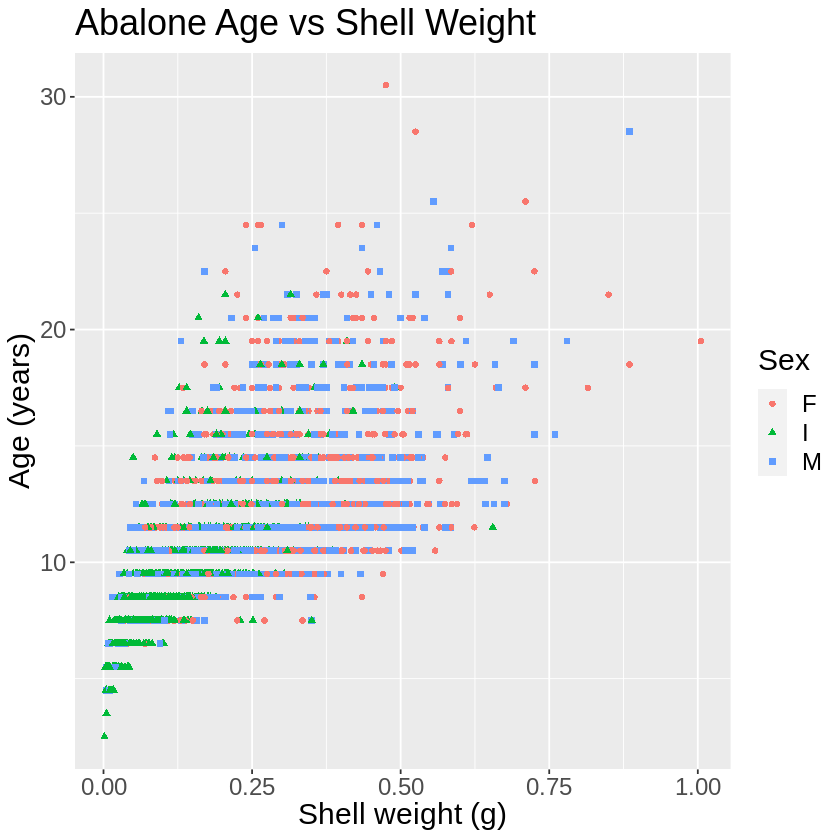

In [13]:
#creating a plot to evaluate shell weight as an age predictor (taking sex into account)

comparative_plot_shell_weight <- shell_train|>
    ggplot(aes(x = shell_weight, y = age)) +
           geom_point(aes(color = sex, shape = sex)) +
    labs(x = "Shell weight (g)", y = "Age (years)", color = "Sex", shape = "Sex") +
    ggtitle("Abalone Age vs Shell Weight") +
    theme(text = element_text(size = 18))
comparative_plot_shell_weight

**Methods**

The dataset we are using answer this question give various statistics on the physical
characteristics of 4178 different mollusks (Kaggle, n.d.).

The characteristics associated with this data set include:
• Length
• Diameter
• Height
• Whole weight
• Shucked weight
• Viscera weight (this is the gut weight after bleeding)
• Shell weight (after being dried)
• Number of rings of these mollusks.
• Sex (categorical variable) - male, female, or infant (infant is a category because mollusks can
switch sexes)

✴The variable age, which is the number of rings plus 1.5 (Nash & Sellers, 1994), was added.

1. The data was already tidy so no wrangling procedures were conducted.
2. The initial_split() function was utilized to split our data frame into 75% training and 25% testing data.
3. To compute the count based on the categorical variable sex, the group_by() and summarize() function combination was employed.
4. The previous step enabled the use of the map_df() function to calculate the mean for the variables in our new data frame.
5. To identify the best predictors to use in the investigation, scatterplots of the different physical characteristics and age were generated.
6. This preliminary analysis indicated that length and diameter are the greatest predictors for the age of abalones. These characteristics are also associated with the ring-age associated procedure outlined in the introduction; a larger shell has space for more rings, and therefore, is likely older.
7. These variables will be used in a multivariable KNN regression.
8. The accuracy of the model will be assessed using the testing dataset.

**Expected outcomes and significance**

_What do you expect to find?_  
We expect to find a positive relationship length and diameter and age of the abalones/number of rings (potentially including the other measurements) that can be used to build a model to predict the age of a new specimen. This prediction is based on the common trend of most (but not all) organisms experiencing greatest positive changes in those dimensions as they grow in age. Studies of mollusc growth similarly support this correlation between mollusk age and shell size (Ridgway, 2010). We hope to find a moderate to strong relationship between these predictor factors and age in order using regression analysis. 
Although we expect to find a moderate-to-strong correlation between a predictive attribute (mainly length and diameter but potentially the other measurements) and age in abalones, an accuracy analysis of the regression model based on the dataset will be necessary in order to confirm this is the case.

_What impact could such findings have?_  
These findings may allow the use of a predictive model estimating as accurately as possible the age of abalones without having to split open their shells and count their rings. Although less precise than manually counting, this method of acquiring abalone age would be much more efficient since our predictive attributes are much easier to measure (Nash & Sellers, 1994). Additionally, using a predicting model for aging is less destructive for the abalone compared to the alternative method.   
Since physical growth and age are important data points for informing population dynamics of abalones (especially considering there might be preferences in size and age by fisheries), our findings might allow fisheries and conservationists to make more informed decisions regarding the harvesting and protection of abalones. In addition, age determination is pivotal to abalone restoration because it provides insight into the groups of abalones that are most susceptible to fishing (likely older individuals due to their size). The age structure of the populations can then be compared to stable populations to inform scientists what actions need to be taken (ie. Fishing bans on abalones of specified dimensions). When considering the implications of this project in a broader context, we learn that this predictive model can foster conservation of abalones and create paths for more sustainable mollusc farming.